# Using SVMs for MNIST Digits

https://github.com/thinkingmachines/open-source-fridays/blob/master/OSF05_Writing-tests/src.py

## Training the model

In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


def load(train_size=0.8):
    digits = datasets.load_digits()
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, train_size=train_size
    )
    return (X_train, X_test, y_train, y_test)


def train(X_train, y_train, C=1.0, gamma=0.001):
    classifier = svm.SVC(C=C, gamma=gamma)
    classifier.fit(X_train, y_train)
    train_preds = classifier.predict(X_train)
    train_score = metrics.accuracy_score(y_train, train_preds)
    print("Training accuracy score {:.3f}".format(train_score))
    return classifier, train_score


def evaluate(classifier, X_test, y_test):
    test_preds = classifier.predict(X_test)
    test_score = metrics.accuracy_score(y_test, test_preds)
    print("Test accuracy score {:.3f}".format(test_score))
    return test_score

In [2]:
X_train, X_test, y_train, y_test = load()

In [3]:
model, score = train(X_train, y_train)

Training accuracy score 0.999


In [16]:
evaluate(model, X_test, y_test)

Test accuracy score 0.997


0.9972222222222222

## Saving the model

In [26]:
import pickle
import numpy as np

In [37]:
with open('svm-mnist.sav', 'wb') as f:
    pickle.dump(model, f)

In [29]:
np.save('X_train.npz', X_train)
np.save('y_train.npz', y_train)
np.save('X_test.npz', X_test)
np.save('y_test.npz', y_test)

# Predict

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
def display_result(pixels, label):
    pixels = pixels.reshape((8, 8))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [34]:
data = X_test[1].reshape(1, -1)
result = model.predict(data)

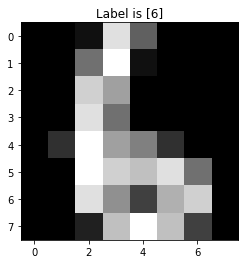

In [36]:
display_result(data[0], result)